<a href="https://colab.research.google.com/github/richkaitoo/Heart-Attack-Risk-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Evaluating the Performance of Different Machine Learning Algorithms for Heart Disease Diagnosis

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [34]:
print('Data source import complete.')
data_path = kagglehub.dataset_download('johnsmith88/heart-disease-dataset')
heart = pd.read_csv(data_path + '/heart.csv')

Data source import complete.


100%|██████████| 6.18k/6.18k [00:00<00:00, 10.3MB/s]

Extracting files...


In [35]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Structure

This section explores the structure the hearts data that will be used for this analysis. This will be carried by using `heart.head()`, `heart.info()`, and `heart.describe()` to understand the data structure, including the number of rows, columns, data types, and summary statistics respectively.



In [36]:
print(heart.head())
print(heart.info())
print(heart.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

The output above describes the heart disease dataset, which includes a data preview of the first few rows, data structure details of 1025 rows and 14 columns with no missing values, data types that are a mix of integers and floats, and summary statistics that provide insights into the distribution and characteristics of each feature.

### Checking for missing values

In order to check if the dataset has missing values, the function `heart.isnull().sum()` is used identify missing values in the dataset.


In [37]:
print(heart.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


The above suggests that, there are no missing values in the heart dataset.

### Visualizing the distribution of variables and outliers

The distribution of data play roles in the accuracy of models. In order to determine whether some variables are either skewed, or normally distributed I use histograms, box plots, and density plots to visualize the distribution of numerical variables.

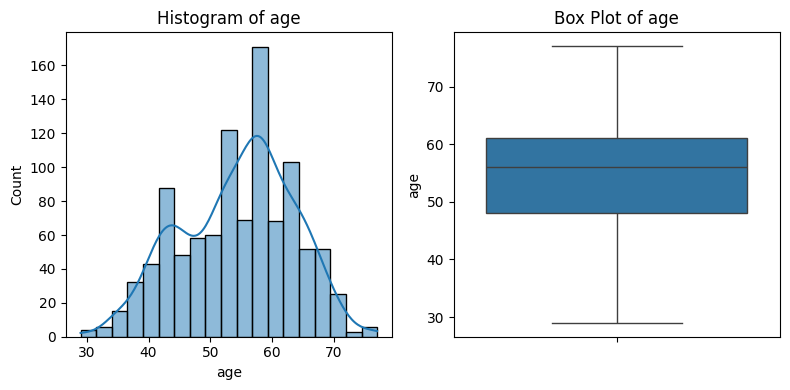

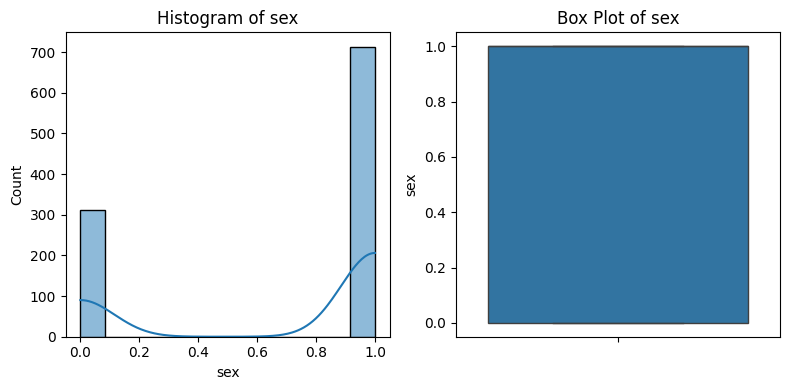

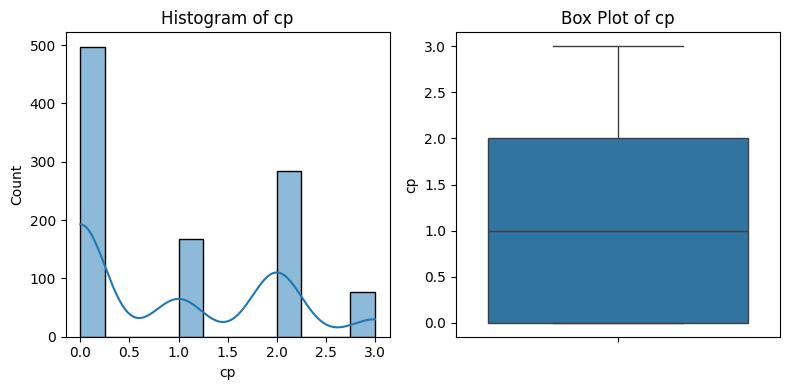

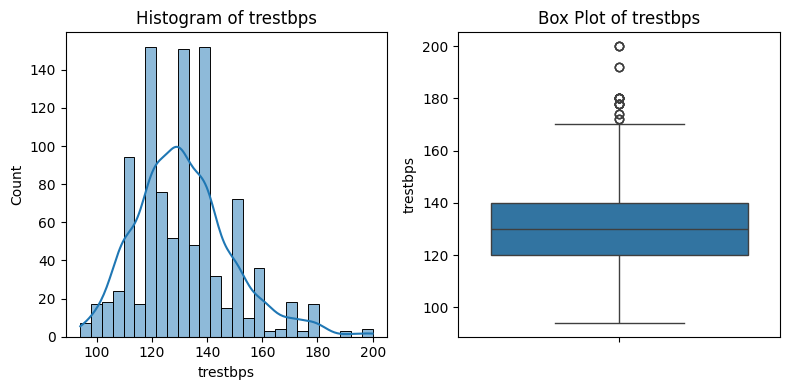

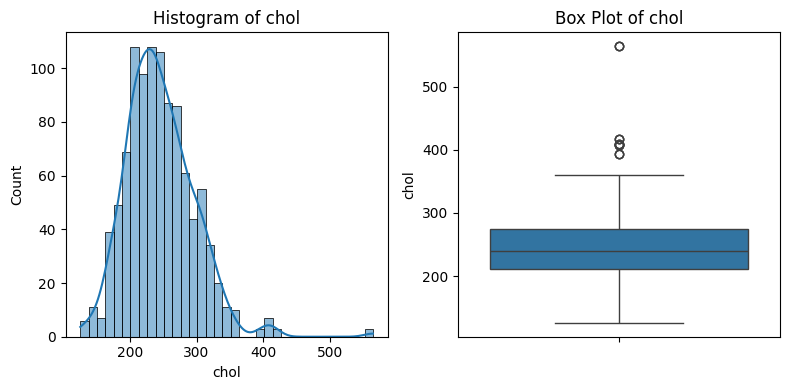

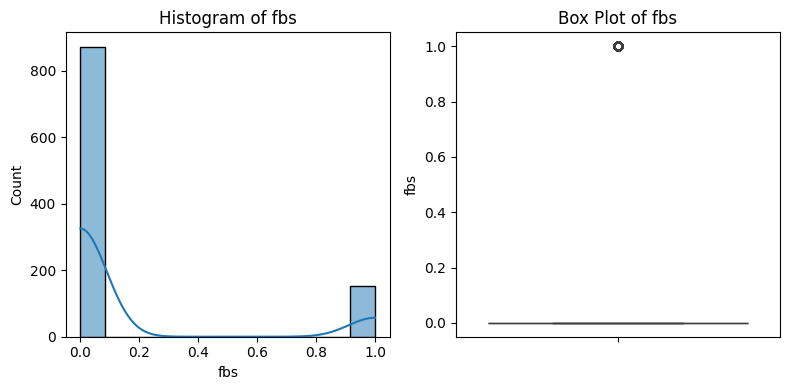

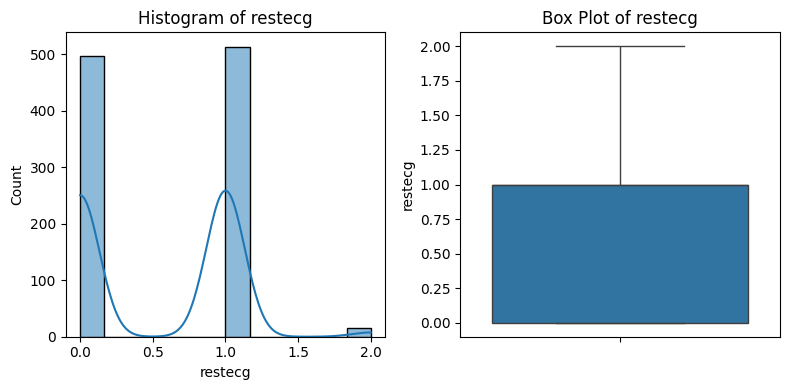

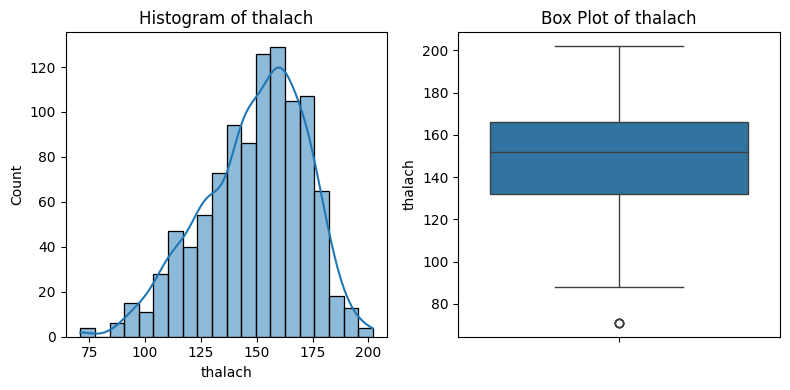

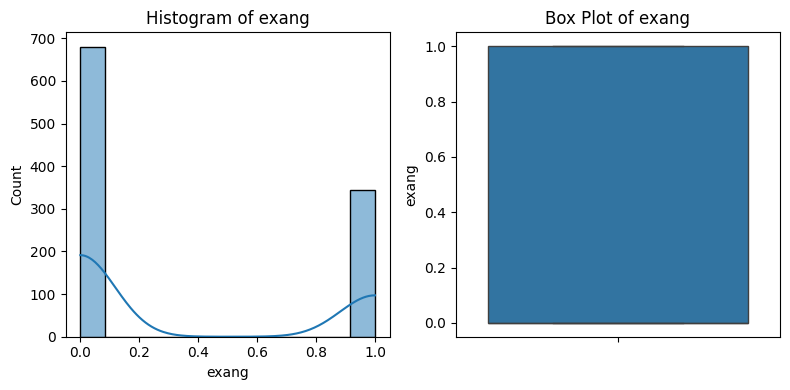

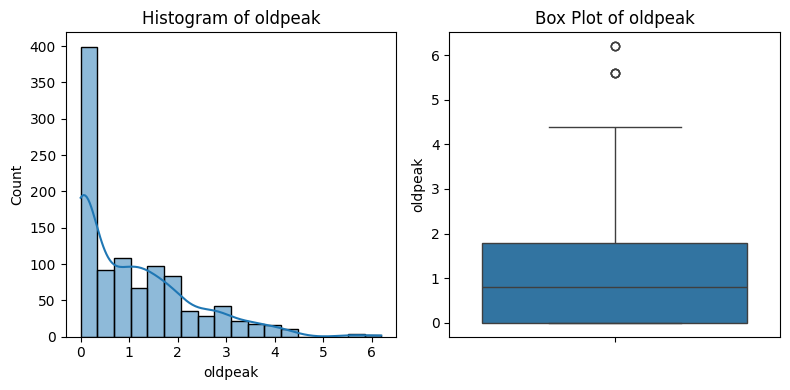

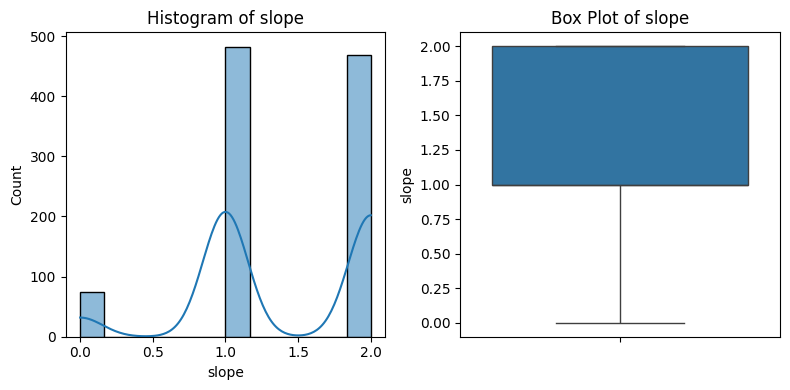

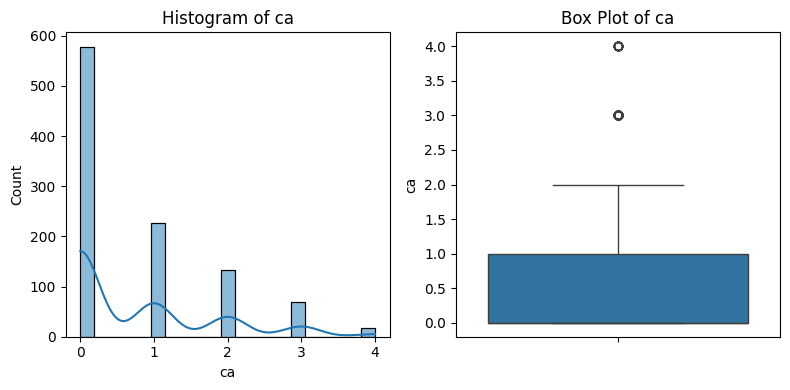

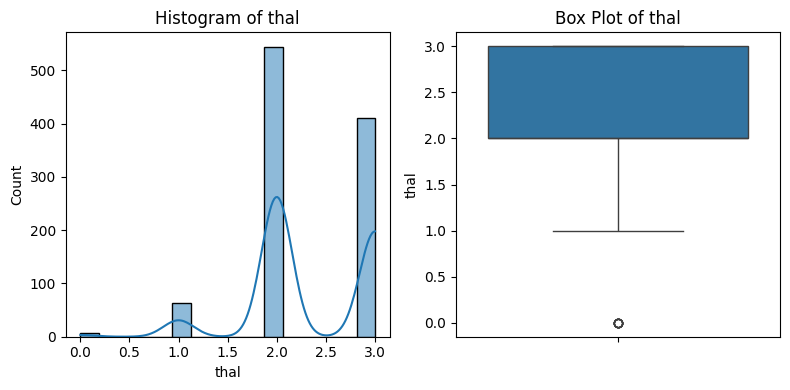

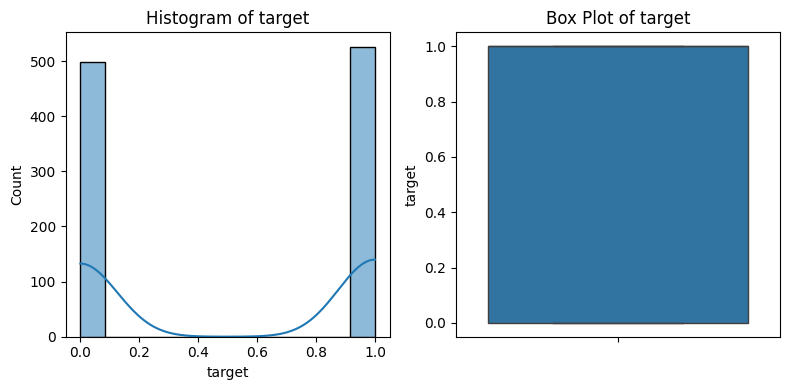

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = heart.select_dtypes(include=['int64', 'float64']).columns

# Create histograms and box plots
for col in numerical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    sns.histplot(heart[col], ax=ax[0], kde=True)
    ax[0].set_title(f'Histogram of {col}')

    sns.boxplot(heart[col], ax=ax[1])
    ax[1].set_title(f'Box Plot of {col}')

    plt.tight_layout()

### Examining relationships between variables

This section will explore the visual relationship between then numerical variables. Heatmaps and correlation matrices will be used to examine the relationships between numerical variables.


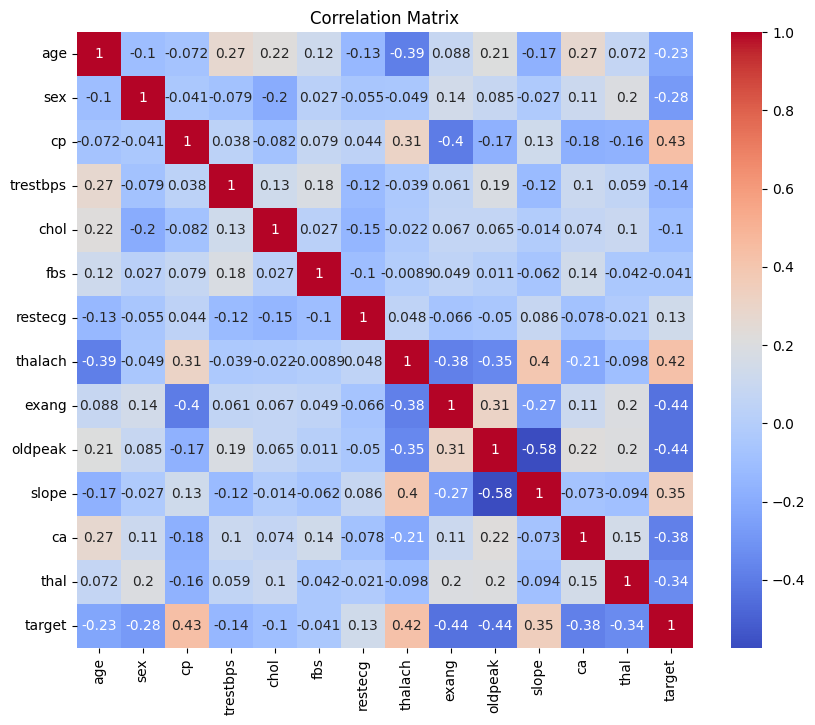

In [24]:
corr_matrix = heart.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [25]:
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


From the above output, the following are observed.

- *Strong positive correlations*: `cp` and `target` (0.43), `thalach` and `slope` (0.40), `exang` and `oldpeak` (-0.44), `target` and `thalach` (0.42)
- *Strong negative correlations*: `target` and `sex` (-0.28), `exang` and `cp` (-0.40), `target` and `ca` (-0.38)


### Processing Data For Machine Learning

In this section, the data will be presented in a format that machine learning models can handle. The categorical variables will be one-hot encoded, and the variables will be transformed using scalar transformation.

Before these preprocessing steps, the data will be split into training and test sets to avoid data leakage and introducing bias into the data.


In [26]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', axis=1), heart['target'], test_size=0.2, random_state=42)

The data has been split into a training set and a test set. Three preprocessing steps will be applied to the data:

1. Binning the age into groups.
2. One-hot encoding.
2. Transforming data using scalar transformation.



In [27]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler

def preprocess_data(X_train, X_test):
    categorical_variables = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    numerical_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']

    # Define preprocessing steps
    categorical_preprocessor = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    numerical_preprocessor = StandardScaler()
    age_preprocessor = KBinsDiscretizer(n_bins=6, encode='onehot-dense', strategy='uniform')

    # Use ColumnTransformer to apply different preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_preprocessor, numerical_columns),
            ('age', age_preprocessor, ['age']),
            ('cat', categorical_preprocessor, categorical_variables)
        ]
    )

    # Fit and transform the data
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)

    # Get the feature names
    feature_names = []
    feature_names += [f"{col}" for col in numerical_columns]
    feature_names += [f"age_{i+1}" for i in range(6)]
    for var in categorical_variables:
        if var == 'age':
            continue
        categories = X_train[var].unique()
        feature_names += [f"{var}_{cat}" for cat in categories]

    return X_train_preprocessed, X_test_preprocessed, feature_names

# Usage
X_train_preprocessed, X_test_preprocessed, feature_names = preprocess_data(X_train, X_test)

# Convert the preprocessed data to DataFrames with feature names
X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

The output above shows the training dataset that has been binned by age and one-hot encoded.

# Modeling

After preprocessing the data, the following section will present a comparative analysis of various classification models. These models were selected due to their widespread use and relevance in the literature. The models that will be adopted are:

1. *Logistic Regression*: A linear model for binary classification problems.
2. *Decision Trees*: A tree-based model that splits data into subsets based on feature values.
3. *Random Forest*: An ensemble model that combines multiple decision trees to improve accuracy and robustness.
4. *Support Vector Machines (SVMs)*: A linear or non-linear model that finds the optimal hyperplane to separate classes.
5. *K-Nearest Neighbors (KNN)*: A model that classifies new instances based on the majority vote of their k-nearest neighbors.
6. *Gradient Boosting*: An ensemble model that combines multiple weak models to create a strong predictive model.



In [28]:
def train_and_evaluate_models(X_train_df, y_train, X_test_df, y_test):
    # Define the models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
        "K-Nearest Neighbors (KNN, k=3)": KNeighborsClassifier(n_neighbors=3),
        "Decision Trees": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machines (SVMs)": SVC(),
        "K-Nearest Neighbors (KNN, default k)": KNeighborsClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    # Train and evaluate the models
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = accuracy_score(y_test, y_pred)

    return results

In [29]:
results = train_and_evaluate_models(X_train_df, y_train, X_test_df, y_test)
for name, accuracy in results.items():
    print(f"Model: {name}, Accuracy: {accuracy:.3f}")

Model: Logistic Regression, Accuracy: 0.795
Model: Linear Discriminant Analysis (LDA), Accuracy: 0.820
Model: K-Nearest Neighbors (KNN, k=3), Accuracy: 0.902
Model: Decision Trees, Accuracy: 0.985
Model: Random Forest, Accuracy: 0.985
Model: Support Vector Machines (SVMs), Accuracy: 0.683
Model: K-Nearest Neighbors (KNN, default k), Accuracy: 0.732
Model: Gradient Boosting, Accuracy: 0.932


From the output above, the accuracy of each model on the test data. The models can be categorized as:

- Top Models:
    - Decision Trees: 98.5%
    - Random Forest: 98.5%
    - Gradient Boosting: 93.2%
- Middle Models:
    - K-Nearest Neighbors (KNN, k=3): 90.2%
    - LDA: 82%
    - Logistic Regression: 79.5%
- Lower Models:
    - K-Nearest Neighbors (KNN, default k): 73.2%
    - Support Vector Machines (SVMs): 68.3%




The output looks okay and overfitting is not evident in any of the models. However, we will use cross-validation to assess whether any of the accuracies occurred by chance.

In [30]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate_models(X_train_df, y_train, X_test_df, y_test):
    # Define the models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
        "K-Nearest Neighbors (KNN, k=3)": KNeighborsClassifier(n_neighbors=3),
        "Decision Trees": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machines (SVMs)": SVC(),
        "K-Nearest Neighbors (KNN, default k)": KNeighborsClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    # Train and evaluate the models with cross-validation
    results = {}
    cv_results = {}
    for name, model in models.items():
        model.fit(X_train_df, y_train)
        y_pred = model.predict(X_test_df)
        results[name] = accuracy_score(y_test, y_pred)

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train_df, y_train, cv=5, scoring='accuracy')
        cv_results[name] = {
            'mean_accuracy': cv_scores.mean(),
            'std_accuracy': cv_scores.std(),
            'accuracy_scores': cv_scores
        }

    return results, cv_results

# Usage
results, cv_results = train_and_evaluate_models(X_train_df, y_train, X_test_df, y_test)

# Print the results
for name, accuracy in results.items():
    print(f"Model: {name}, Accuracy: {accuracy:.3f}")
    print(f"  Cross-Validation Mean Accuracy: {cv_results[name]['mean_accuracy']:.3f}")
    print(f"  Cross-Validation Std Accuracy: {cv_results[name]['std_accuracy']:.3f}")
    print()


Model: Logistic Regression, Accuracy: 0.815
  Cross-Validation Mean Accuracy: 0.871
  Cross-Validation Std Accuracy: 0.028

Model: Linear Discriminant Analysis (LDA), Accuracy: 0.824
  Cross-Validation Mean Accuracy: 0.867
  Cross-Validation Std Accuracy: 0.021

Model: K-Nearest Neighbors (KNN, k=3), Accuracy: 0.951
  Cross-Validation Mean Accuracy: 0.909
  Cross-Validation Std Accuracy: 0.028

Model: Decision Trees, Accuracy: 0.971
  Cross-Validation Mean Accuracy: 0.976
  Cross-Validation Std Accuracy: 0.019

Model: Random Forest, Accuracy: 0.985
  Cross-Validation Mean Accuracy: 0.982
  Cross-Validation Std Accuracy: 0.016

Model: Support Vector Machines (SVMs), Accuracy: 0.888
  Cross-Validation Mean Accuracy: 0.929
  Cross-Validation Std Accuracy: 0.023

Model: K-Nearest Neighbors (KNN, default k), Accuracy: 0.863
  Cross-Validation Mean Accuracy: 0.868
  Cross-Validation Std Accuracy: 0.020

Model: Gradient Boosting, Accuracy: 0.912
  Cross-Validation Mean Accuracy: 0.938
  Cross

Based on the results, the top tier models are:

1. Random Forest: Accuracy: 0.985, Cross-Validation Mean Accuracy: 0.982
2. Decision Trees: Accuracy: 0.971, Cross-Validation Mean Accuracy: 0.976
3. K-Nearest Neighbors (KNN, k=3): Accuracy: 0.951, Cross-Validation Mean Accuracy: 0.909

These three models stand out from the rest due to their high accuracy and cross-validation mean accuracy scores. They demonstrate strong performance and stability across different folds of the data.

Hence, these three models will be selected for further hyperparameter tuning.

The top three models selected are Random Forest, Decision Trees, and KNN. Due to the close performance of these models, I will perform hyperparameter tuning on these three models to see if any of them can surpass the others after optimization.

In [39]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for top 3 models
param_grids = {
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    }
}

# Perform grid search for each model
best_models = {}

for name, model_info in param_grids.items():
    grid_search = GridSearchCV(
        model_info["model"],
        model_info["params"],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train_df, y_train)

    best_models[name] = {
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_,
        "best_estimator": grid_search.best_estimator_
    }

    print(f"Model: {name}")
    print("Best Parameters:", grid_search.best_params_)
    print(f"Best Score: {grid_search.best_score_:.4f}")
    print()


Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9841

Model: Decision Tree
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9793

Model: K-Nearest Neighbors
Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best Score: 0.9890



After using the GridSearch to hyperparamter tune the Random Forest Mode, it was found out that, the best perform model is KNN with k=3, p=2.
Comparing this to the best score of Random Forest, achieved by the model earlier, this is very close to the original score (0.9817). This indicate that the model is KNN has performed well, and the hyperparameter tuning did result in a significant improvement.



## Evaluating the model


In [44]:
best_knn = best_models["K-Nearest Neighbors"]["best_estimator"]
y_pred = best_knn.predict(X_test_df)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 1.0


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102   0]
 [  0 103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



The above results indicates that in summary, the model achieved perfect performance on the test data, with no misclassifications. This is evident from the confusion matrix and the metrics (precision, recall, F1-score, and accuracy)